# Анализ оттока клиентов сети фитнес-центров

Целями данной работы являются:
- прогноз вероятности оттока клиентов сети фитнес-центров на основе имеющихся клиентских анкет;
- создание типичных портретов клиентов;
- анализ признаков, наиболее сильно влияющих на отток;
- разработка рекомендаций по повышению качества работы с клиентами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение признаков</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Кластеризация</a></span></li><li><span><a href="#Сравнение-кластеров" data-toc-modified-id="Сравнение-кластеров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Сравнение кластеров</a></span></li><li><span><a href="#Распределения-признаков-для-кластеров" data-toc-modified-id="Распределения-признаков-для-кластеров-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Распределения признаков для кластеров</a></span></li><li><span><a href="#Доля-оттока-для-кластеров" data-toc-modified-id="Доля-оттока-для-кластеров-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Доля оттока для кластеров</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Знакомство с данными

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.head(10)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Видим, что пропусков в нашей таблице нет. Типы данных заданы корректно. Единственное, для наглядности вещественные числа можно округлить до 2-х знаков после запятой. Названия столбцов для удобства можно привести к нижнему регистру.

## Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [6]:
gym.columns = gym.columns.str.lower()
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Для удобства отображения сократим названия некоторых столбцов.

In [7]:
gym = gym.rename(columns={'avg_additional_charges_total':'avg_ad_charges', 'month_to_end_contract':'month_to_end',
    'avg_class_frequency_total':'avg_freq_total', 'avg_class_frequency_current_month':'avg_freq_month'})

Округлим значения некоторых столбцов (с выручкой и средней частотой посещений) до 2-х знаков после запятой.

In [8]:
gym['avg_ad_charges'] = gym['avg_ad_charges'].round(2)
gym['avg_freq_total'] = gym['avg_freq_total'].round(2)
gym['avg_freq_month'] = gym['avg_freq_month'].round(2)

In [9]:
gym.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_ad_charges  month_to_end  lifetime  avg_freq_total  \
0             1   29           14.23           5.0         3            0.02   
1             1   31          113.20          12.0         7            1.92   
2             0   28          129.45           1.0         2            1.86   
3             1   33           62.67          12.0         2            3.21   
4             0   26          198.36           1.0         3            1.11   

   avg_freq_month  churn  
0            0.00      0  
1            1.91      0  
2            1.74      0  
3            3.36      0  
4            1.12      0

Проверим наши данные на наличие пропусков и дубликатов.

In [10]:
gym.isna().sum()

gender             0
near_location      0
partner            0
promo_friends      0
phone              0
contract_period    0
group_visits       0
age                0
avg_ad_charges     0
month_to_end       0
lifetime           0
avg_freq_total     0
avg_freq_month     0
churn              0
dtype: int64

In [11]:
gym.duplicated().sum()

0

Пропусков и дубликатов в таблице нет.

## Исследовательский анализ данных 

### Распределение признаков

Изучем распределение значений для каждого столбца.

In [12]:
for i in gym.columns:
    print(gym[i].value_counts())

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: near_location, dtype: int64
0    2053
1    1947
Name: partner, dtype: int64
0    2766
1    1234
Name: promo_friends, dtype: int64
1    3614
0     386
Name: phone, dtype: int64
1     2207
12     960
6      833
Name: contract_period, dtype: int64
0    2351
1    1649
Name: group_visits, dtype: int64
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: age, dtype: int64
69.47     3
5.93      3
114.32    3
227.77    3
110.84    3
         ..
61.63     1
134.94    1
117.43    1
74.39     1
14.25     1
Name: avg_ad_charges, Length: 3751, dtype: int64
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end, dtype: int64
1    

Есть несколько типов столбцов:
- бинарные признаки с равномерным распределением: пол, компания-партнер;
- бинарные признаки с доминированием какой-то категории: проживание в районе, где находится фитнес-центр (большинство клиентов живет или работает недалеко от фитнес-центра), запись в рамках акции (только треть клиентов), наличие телефона (подавляющее большинство), групповые занятия (большая часть клиентов не посещала такие занятия), факт оттока (ушла треть клиентов);
- столбцы с количественными показателями.

Посмотрим на средние значения признаков для двух групп: тех, кто ушел, и тех, кто остался.

In [13]:
gym_churn_mean = gym.groupby('churn').mean().reset_index()
gym_churn_mean

churn    gender  near_location   partner  promo_friends     phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   contract_period  group_visits        age  avg_ad_charges  month_to_end  \
0         5.747193      0.464103  29.976523      158.445716      5.283089   
1         1.728558      0.268615  26.989632      115.082903      1.662582   

   lifetime  avg_freq_total  avg_freq_month  
0  4.711807        2.024917        2.027873  
1  0.990575        1.474939        1.044637

Видим существенные отличия между группами по некоторым показателям. Так, для "оставшихся" наблюдаются бОльшие значения по следующим признакам: близость проживания, сотрудник компании-партнера, запись в рамках акции, длительность абонемента, посещение групповых занятий, выручка от других услуг, срок окончания абонемента и средняя частота посещений.        

In [14]:
sns.set_style('whitegrid')

Рассмотрим распределения признаков для ушедших и оставшихся (для столбцов с количественными показателями).

In [15]:
gym_0 = gym.loc[gym['churn'] == 0]
gym_1 = gym.loc[gym['churn'] == 1]

In [16]:
x_values = pd.Series(range(0, len(gym)))
x0_values = pd.Series(range(0, len(gym_0)))
x1_values = pd.Series(range(0, len(gym_1)))

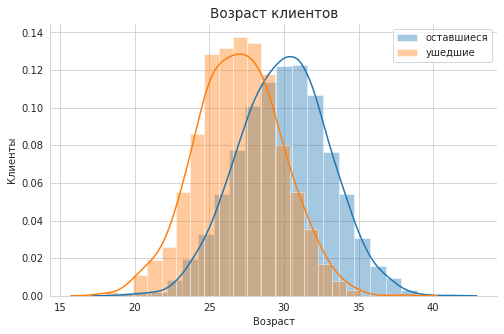

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(gym_0['age'], bins=21, label='оставшиеся')
sns.distplot(gym_1['age'], bins=21, label='ушедшие')
sns.despine()
plt.legend()
plt.title('Возраст клиентов', fontsize=13.5)
plt.xlabel('Возраст')
plt.ylabel('Клиенты')
plt.show;

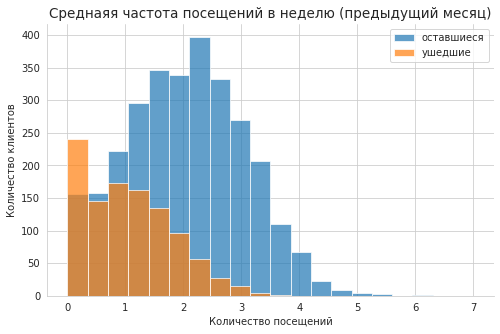

In [18]:
plt.figure(figsize=(8,5))
plt.hist(gym_0['avg_freq_month'], bins=20, alpha=0.7, range=(0,7), label='оставшиеся')
plt.hist(gym_1['avg_freq_month'], bins=20, alpha=0.7, range=(0,7), label='ушедшие')
sns.despine()
plt.legend()
plt.title('Среднаяя частота посещений в неделю (предыдущий месяц)', fontsize=13.5)
plt.xlabel('Количество посещений')
plt.ylabel('Количество клиентов')
plt.show;

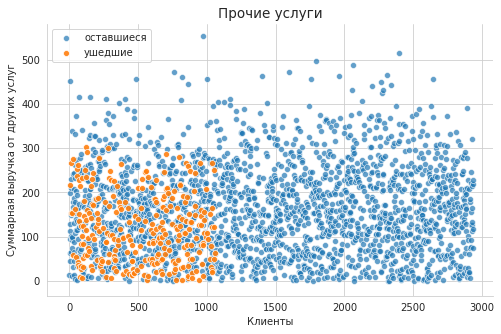

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x0_values, gym_0['avg_ad_charges'], alpha=0.7, label='оставшиеся')
sns.scatterplot(x1_values, gym_1['avg_ad_charges'], alpha=0.9, label='ушедшие')
sns.despine()
plt.legend()
plt.title('Прочие услуги', fontsize=13.5)
plt.xlabel('Клиенты')
plt.ylabel('Суммарная выручка от других услуг')
plt.show;

По гистограммам количественных признаков можно судить о следующих закономерностях:
- средний возраст ушедших чуть ниже: возможно, в этой категории больше студентов, которые не могут позволить себе посещение фитнес-центра по причине отсутствия времени или средств;
- средняя частота посещений в неделю за предыдующий месяц отличается по группам в два раза (2 раза против 1): очевидно, что среди оставшихся намного больше людей, "вовлеченных" в процесс;
- оставшиеся в среднем тратят на дополнительные услуги на треть больше ушедших: это может объясняться как финансовым фактором, так и более активной позицией клиентов, "подсевших" на спорт. 

Подробнее изучим связь оттока с длительностью абонемента. 

In [20]:
gym_abon = gym.groupby(['contract_period','churn']).agg({'age':'count'}).reset_index()
gym_abon = gym_abon.rename(columns={'age': 'clients'})
gym_abon

contract_period  churn  clients
0                1      0     1273
1                1      1      934
2                6      0      729
3                6      1      104
4               12      0      937
5               12      1       23

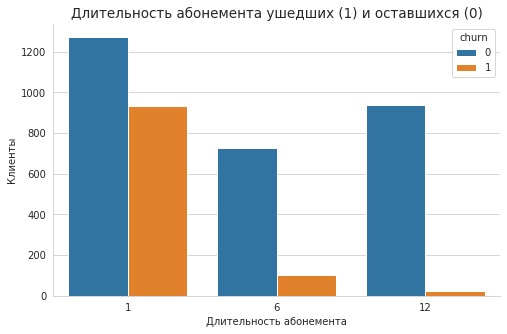

In [21]:
plt.figure(figsize=(8,5))
plt.title('Длительность абонемента ушедших (1) и оставшихся (0)', fontsize=13.5)
sns.barplot(data = gym_abon, x='contract_period' , y='clients', hue='churn')
sns.despine()
plt.xlabel('Длительность абонемента')
plt.ylabel('Клиенты')
plt.show;

In [22]:
gym_abon['total'] = gym_abon.groupby('churn')['clients'].transform('sum')
gym_abon['part'] = round(gym_abon['clients'] / gym_abon['total'], 2)
gym_abon

contract_period  churn  clients  total  part
0                1      0     1273   2939  0.43
1                1      1      934   1061  0.88
2                6      0      729   2939  0.25
3                6      1      104   1061  0.10
4               12      0      937   2939  0.32
5               12      1       23   1061  0.02

Видно, что среди ушедших подавляющее большинство клиентов (88%) владело месячным абонементом, среди оставшихся же этот процент составляет всего 43%. Еще более заметна разница между группами (ушедшие и оставшиеся) по годичному абонементу - 2% и 32%. Это выглядит довольно логичным. Люди, купившие абонемент на длительный срок (полгода, год), настроены более серьезно и реже бросают занятия. С другой стороны, такая покупка добавляет ответственности: раз услуга оплачена, надо ей воспользоваться.    

### Матрица корреляций

Построим матрицу корреляций и визуализируем ее.

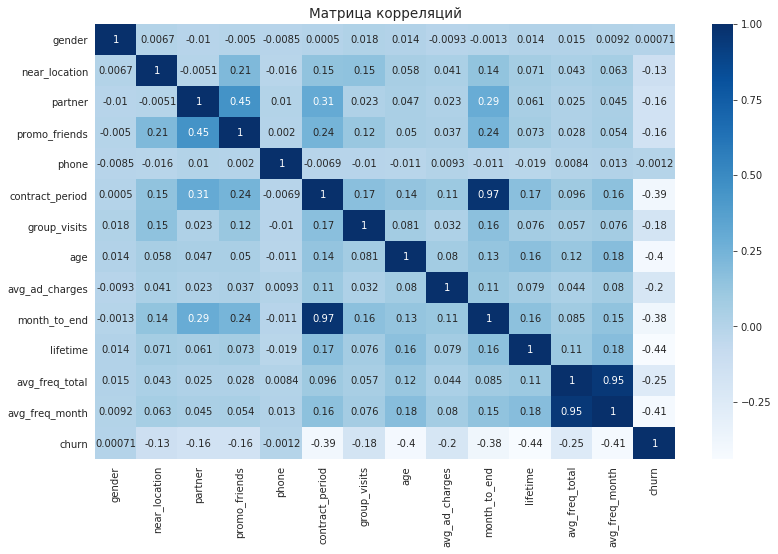

In [23]:
plt.figure(figsize=(13, 8))
sns.heatmap(gym.corr(), cmap='Blues', annot=True)
plt.title('Матрица корреляций', fontsize=13.5)
plt.show;

In [24]:
len(gym.loc[gym['month_to_end'] == gym['contract_period']])

3362

In [25]:
gym_mc = gym['month_to_end'].value_counts().reset_index()
gym_mc.head()

index  month_to_end
0    1.0          2207
1    6.0           645
2   12.0           524
3   11.0           181
4    5.0           130

In [26]:
len(gym.loc[gym['month_to_end'] == gym['contract_period']]) / len(gym)

0.8405

Сразу бросаются в глаза очень сильные корреляционные связи между:
- длительностью абонемента и сроком до окончания абонемента (0.97): это логично, т.к. в подавляющем большинстве случаев (84%) эти показатели совпадают; 
- средней частотой посещений в неделю за предыдущий месяц и за все время (0.95): это также объясняется большим количеством совпадений этих показателей (в случае месячного абонемента).

Из факторов, влияющих непосредственно на отток, выделяются следующие:
- длительность абонемента - средняя отрицательная связь (-0.39);
- срок до окончания абонемента (-0.38);
- возраст (-0.4);
- время с момента первого обращения (-0.44);
- средняя частота посещений за предыдущий месяц (-0.41).

## Модель прогнозирования оттока клиентов

Анализируя матрицу корреляций, мы обнаружили 2 пары признаков с сильной корреляционной связью. Чтобы избавиться от мультиколлинеарности, удалим из датафрейма парные признаки: срок до окончания абонемента и среднюю частоту посещений за все время.  

In [27]:
gym_f = gym.drop(columns={'month_to_end','avg_freq_total'})
gym_f.shape

(4000, 12)

Построим модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце.

Разобьем данные на обучающую и валидационную выборки.

In [28]:
X = gym_f.drop('churn', axis=1)
y = gym_f['churn']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

Зададим алгоритмы: логистическую регрессию и случайный лес. 

In [30]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

Обучим модели.

In [31]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Сделаем прогнозы.

In [33]:
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)

In [34]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:,1]

Рассчитаем метрики Accuracy, Precision и Recall для двух моделей на валидационной выборке.

In [35]:
print('Логистическая регрессия')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_pred)))

Логистическая регрессия
Accuracy: 0.91
Precision: 0.85
Recall: 0.82


In [36]:
print('Случайный лес')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_pred)))

Случайный лес
Accuracy: 0.91
Precision: 0.86
Recall: 0.79


Модели получили схожие оценки по метрикам. Едиственное, Логистическая регрессия показала более высокие результаты по метрике Recall (+3%). Вообще, Recall не самая сильная сторона наших моделей - они делают большое количество ложно отрицательных прогнозов.  

## Кластеризация клиентов

### Кластеризация

Для начала проведем стандартизацию данных. Обучим "стандартизатор" и применим его на выборке.

In [37]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

Построим матрицу расстояний функцией linkage() и нарисуем дендрограмму.

In [38]:
linked = linkage(X_st, method='ward')

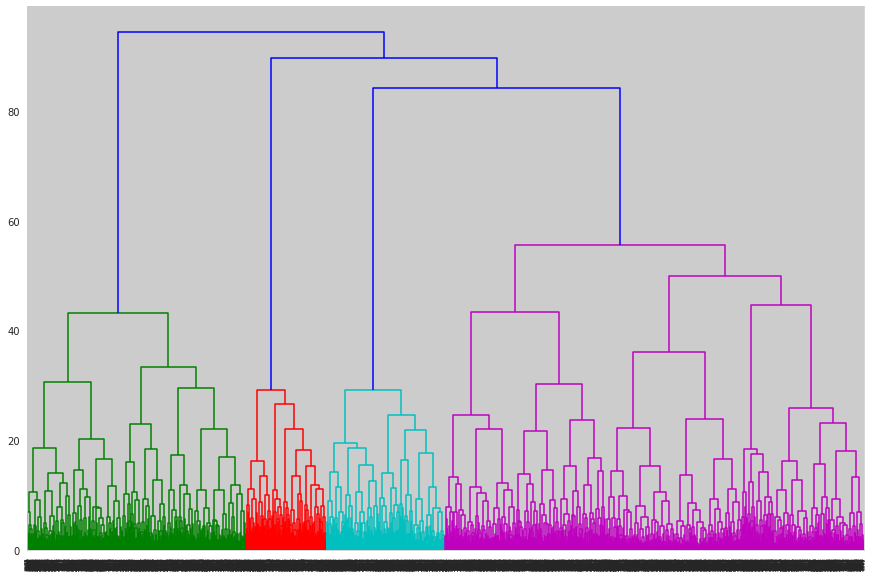

In [39]:
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show;

По дендрограмме можно определить опитмальное количество кластеров. В нашем случае это 4 или 5 кластеров.

Теперь обучим модель кластеризации на основании алгоритма K-means.

In [40]:
km = KMeans(n_clusters=5, random_state=0)

Сформируем вектор кластеров и добавим данные в таблицу.

In [41]:
labels = km.fit_predict(X_st)

In [42]:
gym_f['cluster'] = labels

### Сравнение кластеров

Посмотрим на средние значения признаков по кластерам.

In [43]:
gym_f['cluster'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster, dtype: int64

In [44]:
gym_f.groupby('cluster').mean()

gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.496447       0.995939  0.892386       1.000000    1.0   
1        0.500000       0.000000  0.489247       0.078853    1.0   
2        0.500940       1.000000  0.217105       0.072368    1.0   
3        0.534260       0.996028  0.379345       0.009930    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  avg_ad_charges  lifetime  \
cluster                                                                       
0               6.922843      0.524873  29.606091      153.424802  4.283249   
1               2.994624      0.232975  28.679211      137.125556  2.974910   
2               2.010338      0.277256  27.583647      119.339915  1.922932   
3               6.208540      0.538232  30.699106      176.259573  5.415094   
4               4.777202      0.427461  29.297927      144.208212  3.940415   

         avg_freq_month     churn  
cluster                            
0              1.919411  0.119797  
1              1.596918  0.403226  
2              1.203383  0.563910  
3              2.324459  0.014896  
4              1.723964  0.266839

Видим, что сильнее всего кластеры различаются по следующим признакам: проживание в районе, сотрудник компании-партнера, запись в рамках акции, длительность абонемента, доп. услуги, групповые занятие и частота посещения.

По полу и возрасту отличия не столь существенны.  

### Распределения признаков для кластеров

Изучим распределения признаков по кластерам.

In [45]:
gym_cl_per = gym_f.groupby(['cluster', 'contract_period'])['age'].count().reset_index()
gym_cl_per = gym_cl_per.rename(columns={'age':'clients'})
gym_cl_per.head()

cluster  contract_period  clients
0        0                1      315
1        0                6      256
2        0               12      414
3        1                1      399
4        1                6      106

Рассчитаем долю каждого кластера для месячных, полугодовых и годовых абонементов.

In [46]:
gym_cl_per['total'] = gym_cl_per.groupby('contract_period')['clients'].transform('sum')
gym_cl_per['part'] = round(gym_cl_per['clients'] / gym_cl_per['total'] * 100)
gym_cl_per.sort_values(by='contract_period')

cluster  contract_period  clients  total  part
0         0                1      315   2207  14.0
3         1                1      399   2207  18.0
6         2                1      891   2207  40.0
9         3                1      396   2207  18.0
12        4                1      206   2207   9.0
1         0                6      256    833  31.0
4         1                6      106    833  13.0
7         2                6      138    833  17.0
10        3                6      246    833  30.0
13        4                6       87    833  10.0
2         0               12      414    960  43.0
5         1               12       53    960   6.0
8         2               12       35    960   4.0
11        3               12      365    960  38.0
14        4               12       93    960  10.0

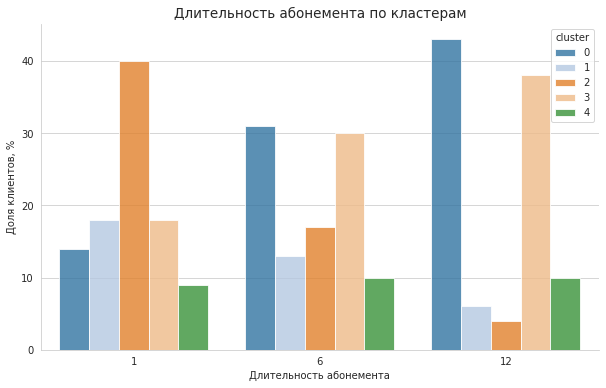

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=gym_cl_per, x='contract_period', y='part',
                palette='tab20', hue='cluster', alpha=0.8)
sns.despine()
plt.title('Длительность абонемента по кластерам', fontsize=13.5)
plt.xlabel('Длительность абонемента')
plt.ylabel('Доля клиентов, %')
plt.show;

Среди владельцев месячных абонементов резко выделяются представители 2-го кластера (40% от общего количества). Полугодовые и годовые абонементы приобретают в основном клиенты из 0-го и 3-го кластеров (в сумме 61% и 81% от общего количества).

In [48]:
gym_f.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_ad_charges  lifetime  avg_freq_month  churn  cluster  
0             1   29           14.23         3            0.00      0        4  
1             1   31          113.20         7            1.91      0        3  
2             0   28          129.45         2            1.74      0        2  
3             1   33           62.67         2            3.36      0        0  
4             0   26          198.36         3            1.12      0        0

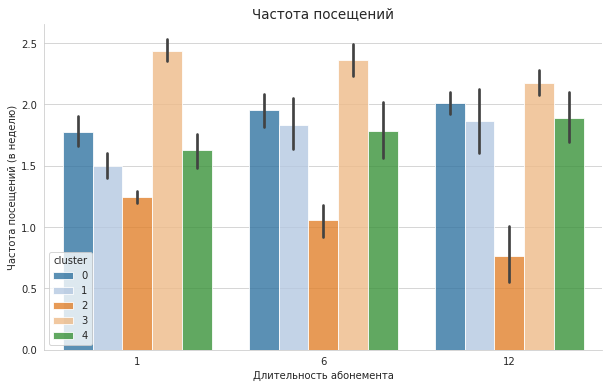

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=gym_f, x='contract_period', y='avg_freq_month',
                palette='tab20', hue='cluster', alpha=0.8)
sns.despine()
plt.title('Частота посещений', fontsize=13.5)
plt.xlabel('Длительность абонемента')
plt.ylabel('Частота посещений (в неделю)')
plt.show;

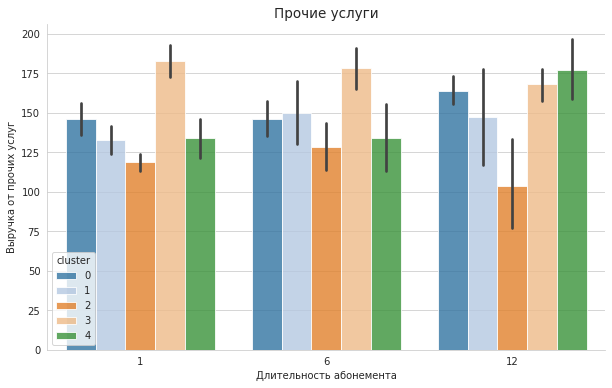

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=gym_f, x='contract_period', y='avg_ad_charges',
                palette='tab20', hue='cluster', alpha=0.8)
sns.despine()
plt.title('Прочие услуги', fontsize=13.5)
plt.xlabel('Длительность абонемента')
plt.ylabel('Выручка от прочих услуг')
plt.show;

По частоте посещений и затратам на другие услуги наблюдается похожая картина: лидируют представители 3-го и 0-го кластеров, представители 1-го и 2-го кластеров - среди аутсайдеров.

### Доля оттока для кластеров

Изучим зависимость доли оттока от ключевых показателей для каждого кластера.

In [51]:
gym_f_mean = gym_f.groupby('cluster').mean().sort_values(by='churn').round(3)
gym_f_mean

gender  near_location  partner  promo_friends  phone  \
cluster                                                         
3         0.534          0.996    0.379          0.010    1.0   
0         0.496          0.996    0.892          1.000    1.0   
4         0.523          0.863    0.472          0.306    0.0   
1         0.500          0.000    0.489          0.079    1.0   
2         0.501          1.000    0.217          0.072    1.0   

         contract_period  group_visits     age  avg_ad_charges  lifetime  \
cluster                                                                    
3                  6.209         0.538  30.699         176.260     5.415   
0                  6.923         0.525  29.606         153.425     4.283   
4                  4.777         0.427  29.298         144.208     3.940   
1                  2.995         0.233  28.679         137.126     2.975   
2                  2.010         0.277  27.584         119.340     1.923   

         avg_freq_month  churn  
cluster                         
3                 2.324  0.015  
0                 1.919  0.120  
4                 1.724  0.267  
1                 1.597  0.403  
2                 1.203  0.564

In [52]:
gym_f['cluster'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster, dtype: int64

По доле оттока кластеры распределились следующим образом:
- самые надежные клиенты (с наименьшей долей оттока) представляют 3-й и 0-ый кластеры; клиентов из 3-го кластера можно назвать сверхнадежными (для них показатель оттока составляет всего лишь 1%);
- клиенты, наиболее сколнные к оттоку, находятся во 1-м и 2-м кластерах (доля оттока 40% и 56% соответственно);
- 4-й кластер является середнячком (27% оттока).

## Выводы и рекомендации

I. На этапе предобработки мы проверили данные на наличие пропусков и дубликатов (обнаружить их не удалось). Изучив типы столбцов, мы убедились, что категориальные признаки уже были приведены к множеству бинарных полей и что типы столбцов заданы корректно.

В рамках EDA мы проанализировали распределения как бинарных, так и количественных признаков, убедившись в достоверности и правдоподобности данных (об этом говорит вид распределения и отсутствие аномальных значений). 

С помощью матрицы корреляций были найдены две пары признаков с сильной корреляционной связью (более 95%). Для решения проблемы мультиколлинеарности парные столбцы (срок до окончания абонемента и средняя частота посещения за все время) были удалены.

II. Используя алгоритмы Логистическая регрессия и Случайный лес, мы построили модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце. Предварительно разбив выборку на тестовую и валидационную, мы обучили наши модели на тестовой выборке и сделали прогноз на валидационной. Для оценки эффективности двух моделей были рассчитаны метрики Accuracy, Precision и Recall: показатели Логистической регрессии оказались выше аналогичных показателей модели Случайный лес на 2-3%.  

III. После предварительной стандартизации данных мы построили матрицу расстояний функцией linkage() и нарисовали дендрограмму. Таким образом удалось найти оптимальное число кластеров - 5. Затем с помощью алгоритма K-means мы обучили модель кластеризации и спрогнозировали кластеры клиентов. Анализ получившихся кластеров позволяет сделать следующие выводы:
- в кластер с наименьшей долей оттока (1%) - 3-й - судя по всему, попали клиенты, максимально вовлеченные в процесс занятий; об этом говорят высокие показатели по частоте посещений (2-3 раза в неделю), по тратам на другие услуги фитнес-центра и по посещению групповых занятий (54% занимающихся); для клиентов этой категории характерны: длительные абонементы (полугодовые и годовые), проживание или работа в районе фитнес-центра, невысокий процент записи в рамках акции;
- 0-й кластер (доля оттока 12%) составляют клиенты, попавшие в клуб по партнерской программе и/или по акции "Приведи друга" (показатели по этим признакам 89% и 100%); они также проживают (работают) в непросредственной близости от фитнес-центра, регулярно посещают тренировки (около 2 раз в неделю) и довольно активны в клубе (другие услуги и групповые занятия);
- главной особенностью представителей 4-го кластера (около 400 человек, отток 27%) является отсутствие контактного телефона, что выглядит довольно странным; все показатели у клиентов из этой категории находятся на среднем уровне, уступая показателям лидеров (3-й и 0-й кластеры);
- клиентов из 1-го кластера (отток 40%) объединяет факт проживания (работы) в удаленных от фитнес-центра районах;
- аутсайдером по доле оттока (56%) является 2-й кластер (самая многочисленная группа); здесь мы видим низкие значения ключевых показателей: частота посещений - около 1 раза в неделю, длительность абонемента - 2 месяца, небольшие затраты на другие услуги центра; также обращает на себя внимание средний возраст этой категории: представители этого кластера в среднем моложе остальных клиентов на 2-3 года.

IV. На основе проведенного анализа можно сформулировать некоторые рекомендации по повышению качества работы с клиентами:
- одной из главных задач в работе с посетителями представляется вовлечение клиентов в жизнь фитнес-клуба: активное посещение занятий (самостоятельных и групповых), кафе, магазина при клубе, массажного салона; клиенты, пользующиеся разными услугами, намного реже попадают в отток; добиться такой вовлеченности можно попробовать с помощью различных акций (скидок) на доп. услуги, бесплатных групповых занятий, системы поощрений наиболее активных членов клуба и т.д.;
- серьезной проблемой является большой отток клиентов с месячным абонементом (2-й кластер); очевидно, люди просто не успевают втянуться, почувствовать вкус занятий; решить эту проблему может индивидуальный подход к таким клиентам: персональные предложения (студентам), скидки на длительные абонементы, введение трехмесячного абонемента (компромиссный вариант);
- странным кажется отсутствие в базе контактных телефонов 400 человек; необходимо "установить контакт" с этими клиентами, используя телефон, мессенджеры или эл. почту;
- перспективной выглядит стратегия привлечения клиентов через партнерскую программу (скидка сотрудникам компании-партнера) и акцию "Приведи друга": 0-й кластер, полностью состоящий из людей, попавших в клуб через эти каналы, демонстрирует высокий уровень лояльности (всего 12% оттока).